In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")


In [2]:
df1=pd.read_csv("2015.csv")
df2=pd.read_csv("2016.csv")
df3=pd.read_csv("2017.csv")
df4=pd.read_csv("2018.csv")
df5=pd.read_csv("2019.csv")


In [3]:
df1.drop(["Region"], axis=1, inplace=True)
df1["Year"] = 2015
df1.rename(columns={"Happiness Rank": "Rank",
            "Happiness Score": "Score", 
            "Standard Error": "Error", 
            "Family": "social_support",
            "Economy (GDP per Capita)": "Economy", 
            "Health (Life Expectancy)": "life_expectancy", 
            "Trust (Government Corruption)": "Corruption", 
            "Dystopia Residual": "dsytopia_residual"}, 
            inplace=True)

df2["Error"] = df2["Upper Confidence Interval"] - df2["Lower Confidence Interval"]
df2.drop(["Region","Upper Confidence Interval","Lower Confidence Interval"], axis=1, inplace=True)
df2["Year"] = 2016
df2.rename(columns={"Happiness Rank": "Rank", 
            "Happiness Score": "Score", 
            "Family": "social_support",
            "Economy (GDP per Capita)": "Economy", 
            "Health (Life Expectancy)": "life_expectancy", 
            "Trust (Government Corruption)": "Corruption", 
            "Dystopia Residual": "dsytopia_residual"}, 
            inplace=True)

df3["Error"] = df3["Whisker.high"] - df3["Whisker.low"]
df3.drop(["Whisker.high","Whisker.low"], axis=1, inplace=True)
df3["Year"] = 2017
df3.rename(columns={"Happiness.Rank": "Rank", 
            "Happiness.Score": "Score", 
            "Family": "social_support",
            "Economy..GDP.per.Capita.": "Economy", 
            "Health..Life.Expectancy.": "life_expectancy", 
            "Trust..Government.Corruption.": "Corruption", 
            "Dystopia.Residual": "dsytopia_residual"}, 
            inplace=True)

df4["Year"] = 2018
df4.rename(columns={"Overall rank": "Rank", 
            "Country or region": "Country",
            "GDP per capita": "Economy", 
            "Social support": "social_support",
            "Healthy life expectancy": "life_expectancy", 
            "Freedom to make life choices": "Freedom", 
            "Perceptions of corruption": "Corruption"}, 
            inplace=True)

df5["Year"] = 2019
df5.rename(columns={"Overall rank": "Rank", 
            "Country or region": "Country",
            "GDP per capita": "Economy", 
            "Social support": "social_support",
            "Healthy life expectancy": "life_expectancy", 
            "Freedom to make life choices": "Freedom", 
            "Perceptions of corruption": "Corruption"}, 
            inplace=True)

In [4]:
df1.head(3)

,Country,Rank,Score,Error,Economy,social_support,life_expectancy,Freedom,Corruption,Generosity,dsytopia_residual,Year
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


In [5]:
df2.head(3)

,Country,Rank,Score,Economy,social_support,life_expectancy,Freedom,Corruption,Generosity,dsytopia_residual,Error,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0.132,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0.162,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0.336,2016


In [6]:
df3.head(3)

,Country,Rank,Score,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,dsytopia_residual,Error,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.114889,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.119456,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.236061,2017


In [7]:
df4.head(3)

,Rank,Country,Score,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018


In [8]:
df5.head(3)

,Rank,Country,Score,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019


In [9]:
#Verileri birleştir

In [10]:
cols = ["Rank","Country","Economy","social_support","life_expectancy","Freedom","Generosity","Corruption","Year"]
data = pd.concat([df1[cols],df2[cols],df3[cols],df4[cols],df5[cols]], axis=0).reset_index(drop=True)
data.sample(10)

,Rank,Country,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
608,139,Togo,0.259000,0.474000,0.253000,0.434000,0.158000,0.101000,2018
390,76,Jamaica,0.925579,1.368218,0.641022,0.474307,0.233818,0.055268,2017
632,7,Sweden,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,2019
167,10,Sweden,1.451810,1.087640,0.831210,0.582180,0.382540,0.408670,2016
171,14,Costa Rica,1.068790,1.021520,0.761460,0.552250,0.225530,0.105470,2016
322,8,New Zealand,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2017
714,89,Morocco,0.801000,0.782000,0.782000,0.418000,0.036000,0.076000,2019
347,33,Taiwan Province of China,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2017
6,7,Netherlands,1.329440,1.280170,0.892840,0.615760,0.476100,0.318140,2015
467,153,Tanzania,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2017


In [11]:
data.isnull().sum() #null değer varmı diye bakıyoruz.

Rank               0
Country            0
Economy            0
social_support     0
life_expectancy    0
Freedom            0
Generosity         0
Corruption         1
Year               0
dtype: int64

In [12]:
data[data["Corruption"].isnull()]

,Rank,Country,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
489,20,United Arab Emirates,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [13]:
#null değeri doldurmak için UAE nin diğer yıllardaki datalarına bakacağız


In [14]:
data[data["Country"]=="United Arab Emirates"]

,Rank,Country,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
19,20,United Arab Emirates,1.427270,1.12575,0.809250,0.641570,0.264280,0.38583,2015
185,28,United Arab Emirates,1.573520,0.87114,0.729930,0.562150,0.265910,0.35561,2016
335,21,United Arab Emirates,1.626343,1.26641,0.726798,0.608345,0.360942,0.32449,2017
489,20,United Arab Emirates,2.096000,0.77600,0.670000,0.284000,0.186000,NaN,2018
646,21,United Arab Emirates,1.503000,1.31000,0.825000,0.598000,0.262000,0.18200,2019


In [15]:
#null değeri linear regression kullanarak dolduracağız


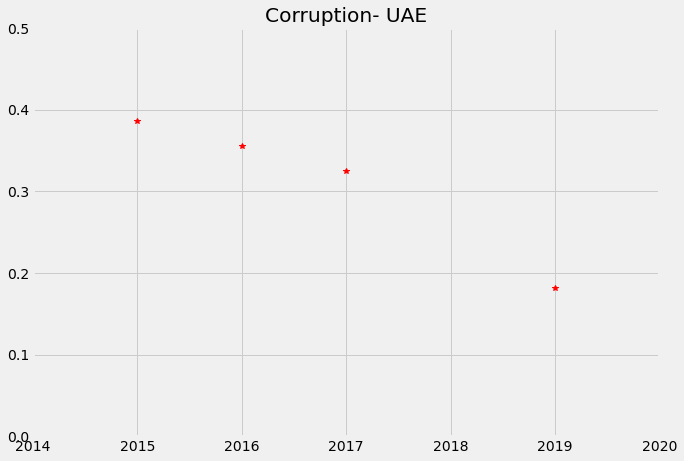

In [16]:
d=data[data["Country"]== "United Arab Emirates"][["Corruption","Year"]]
plt.figure(figsize=(10,7))
plt.plot(d["Year"], d["Corruption"], "*", color="red")
plt.axis([2014,2020, 0, 0.5])
plt.title("Corruption- UAE")
plt.show()

In [17]:
#regresyon ile 2018 için değer tahmini yapıyoruz.


In [18]:
X=d[d["Year"] !=2018]["Year"].values.reshape(-1,1)
y=d[d["Year"] !=2018]["Corruption"].values
reg=LinearRegression().fit(X,y)
print("2018 estimation:", reg.predict(np.array(2018).reshape(-1,1)))

2018 estimation: [0.24751273]


In [19]:
i=data[data["Corruption"].isnull()].index
data["Corruption"][i] = reg.predict(np.array(2018).reshape(-1,1))
data[data["Country"] == "United Arab Emirates"]

,Rank,Country,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
19,20,United Arab Emirates,1.427270,1.12575,0.809250,0.641570,0.264280,0.385830,2015
185,28,United Arab Emirates,1.573520,0.87114,0.729930,0.562150,0.265910,0.355610,2016
335,21,United Arab Emirates,1.626343,1.26641,0.726798,0.608345,0.360942,0.324490,2017
489,20,United Arab Emirates,2.096000,0.77600,0.670000,0.284000,0.186000,0.247513,2018
646,21,United Arab Emirates,1.503000,1.31000,0.825000,0.598000,0.262000,0.182000,2019


In [20]:
print("Total Nulls:", data.isnull().sum().sum())

Total Nulls: 0


In [21]:
#Grouping by countries and ranking their scores

In [22]:
grouped_country = data.groupby("Country").mean()

In [23]:
#Countries with the highest scores

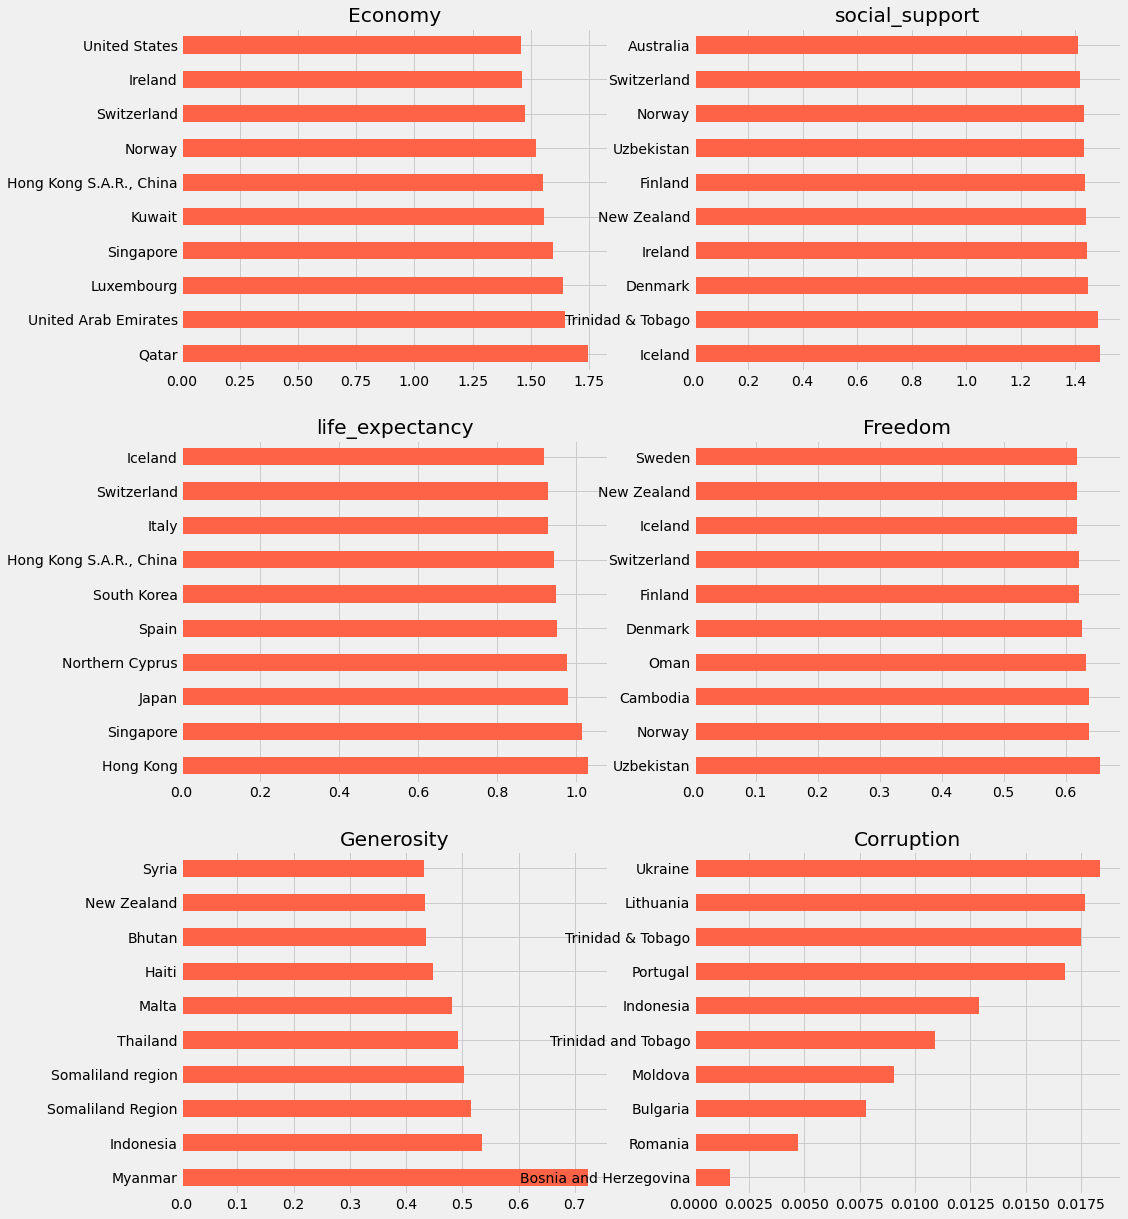

In [24]:
fig=plt.figure(figsize=(15,20))
rows=3
columns=2
for i , column in enumerate(grouped_country.columns.values[1:-1]):
    if column != "Corruption":
        sorted_grouped_country = grouped_country.sort_values(column, ascending=False)[:10]
    else:
        sorted_grouped_country= grouped_country.sort_values(column)[:10]
    plt.subplot(rows, columns, i+1)
    sorted_grouped_country[column].plot(kind="barh", color="tomato")
    plt.ylabel("")
    plt.title(column)

In [25]:
#countries with the lowest scores

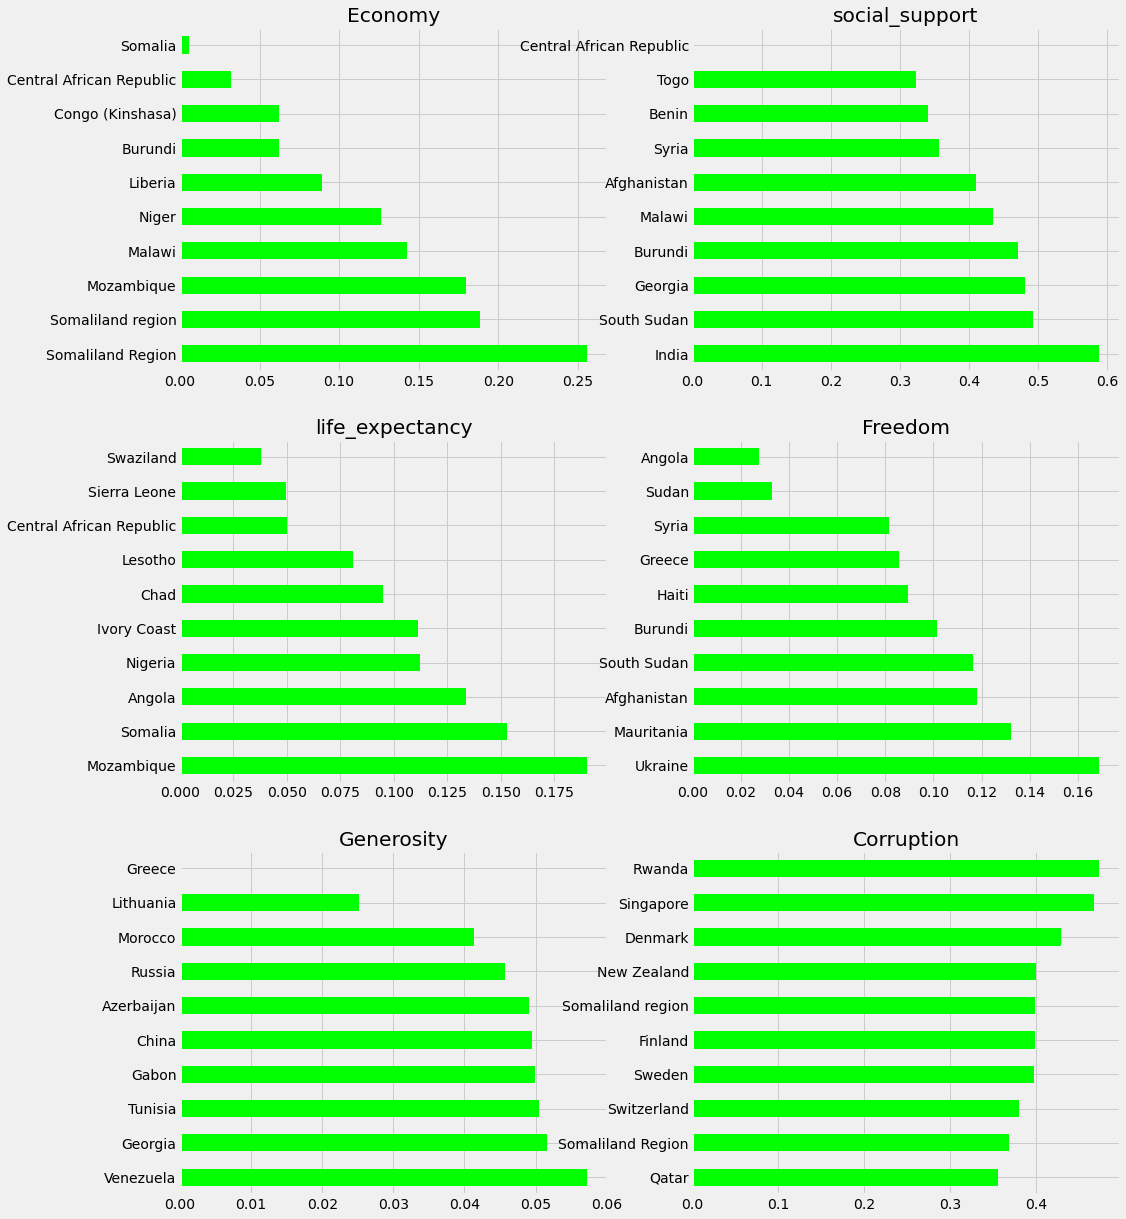

In [26]:
fig=plt.figure(figsize=(15,20))

rows=3
columns=2
for i, column in enumerate(grouped_country.columns.values[1:-1]):
    if column != "Corruption":
        sorted_grouped_country = grouped_country.sort_values(column, ascending= False).tail(10)
    else:
        sorted_grouped_country = grouped_country.sort_values(column).tail(10)
    plt.subplot(rows,columns,i+1)
    sorted_grouped_country[column].plot(kind="barh", color= "lime")
    plt.ylabel("")
    plt.title(column)
    

In [27]:
#changes through years

In [28]:
grouped_years = data.sort_values(["Year","Rank"]).groupby("Year").head(10).reset_index(drop=True)
grouped_years

,Rank,Country,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
0,1,Switzerland,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015
1,2,Iceland,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2015
2,3,Denmark,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2015
3,4,Norway,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2015
4,5,Canada,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2015
5,6,Finland,1.290250,1.318260,0.889110,0.641690,0.233510,0.413720,2015
6,7,Netherlands,1.329440,1.280170,0.892840,0.615760,0.476100,0.318140,2015
7,8,Sweden,1.331710,1.289070,0.910870,0.659800,0.362620,0.438440,2015
8,9,New Zealand,1.250180,1.319670,0.908370,0.639380,0.475010,0.429220,2015
9,10,Australia,1.333580,1.309230,0.931560,0.651240,0.435620,0.356370,2015


IndexError: list index out of range

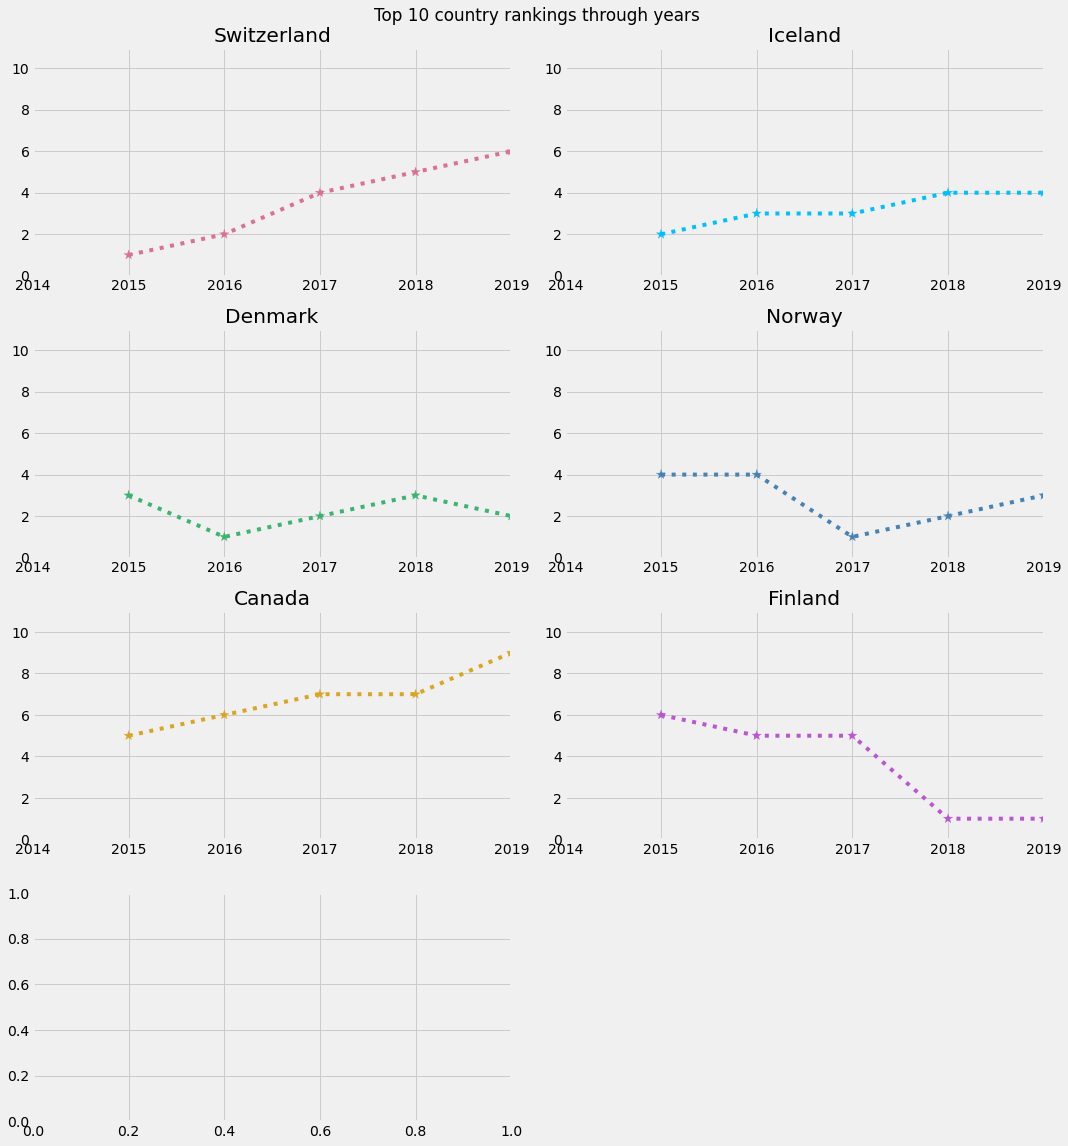

In [29]:
colors= ["palevioletred","deepskyblue","mediumseagreen","steelblue","goldenrod","mediumorchid"]
fig = plt.figure(figsize=(15,20))
for i, country in enumerate(grouped_years["Country"].unique()[:10]):
    plt.subplot(5,2,i+1)
    plt.scatter(grouped_years[grouped_years["Country"] == country]["Year"], grouped_years[grouped_years["Country"] == country]["Rank"], s=100, marker="*", linestyle="dotted", c=colors[i])
    plt.plot(grouped_years[grouped_years["Country"] == country]["Year"], grouped_years[grouped_years["Country"] == country]["Rank"], linestyle="dotted", c=colors[i])
    plt.axis([2014,2019, 0,11])
    plt.title(country)
    plt.suptitle("Top 10 country rankings through years")
    plt.tight_layout()
                                                                              

In [30]:
grouped_years_=data.sort_values(["Year","Rank"]).groupby("Year").tail(10).reset_index(drop=True)
grouped_years_


,Rank,Country,Economy,social_support,life_expectancy,Freedom,Generosity,Corruption,Year
0,149,Chad,0.341930,0.760620,0.150100,0.235010,0.183860,0.052690,2015
1,150,Guinea,0.174170,0.464750,0.240090,0.377250,0.286570,0.121390,2015
2,151,Ivory Coast,0.465340,0.771150,0.151850,0.468660,0.201650,0.179220,2015
3,152,Burkina Faso,0.258120,0.851880,0.271250,0.394930,0.217470,0.128320,2015
4,153,Afghanistan,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,2015
5,154,Rwanda,0.222080,0.773700,0.428640,0.592010,0.226280,0.551910,2015
6,155,Benin,0.286650,0.353860,0.319100,0.484500,0.182600,0.080100,2015
7,156,Syria,0.663200,0.474890,0.721930,0.156840,0.471790,0.189060,2015
8,157,Burundi,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,2015
9,158,Togo,0.208680,0.139950,0.284430,0.364530,0.166810,0.107310,2015


IndexError: list index out of range

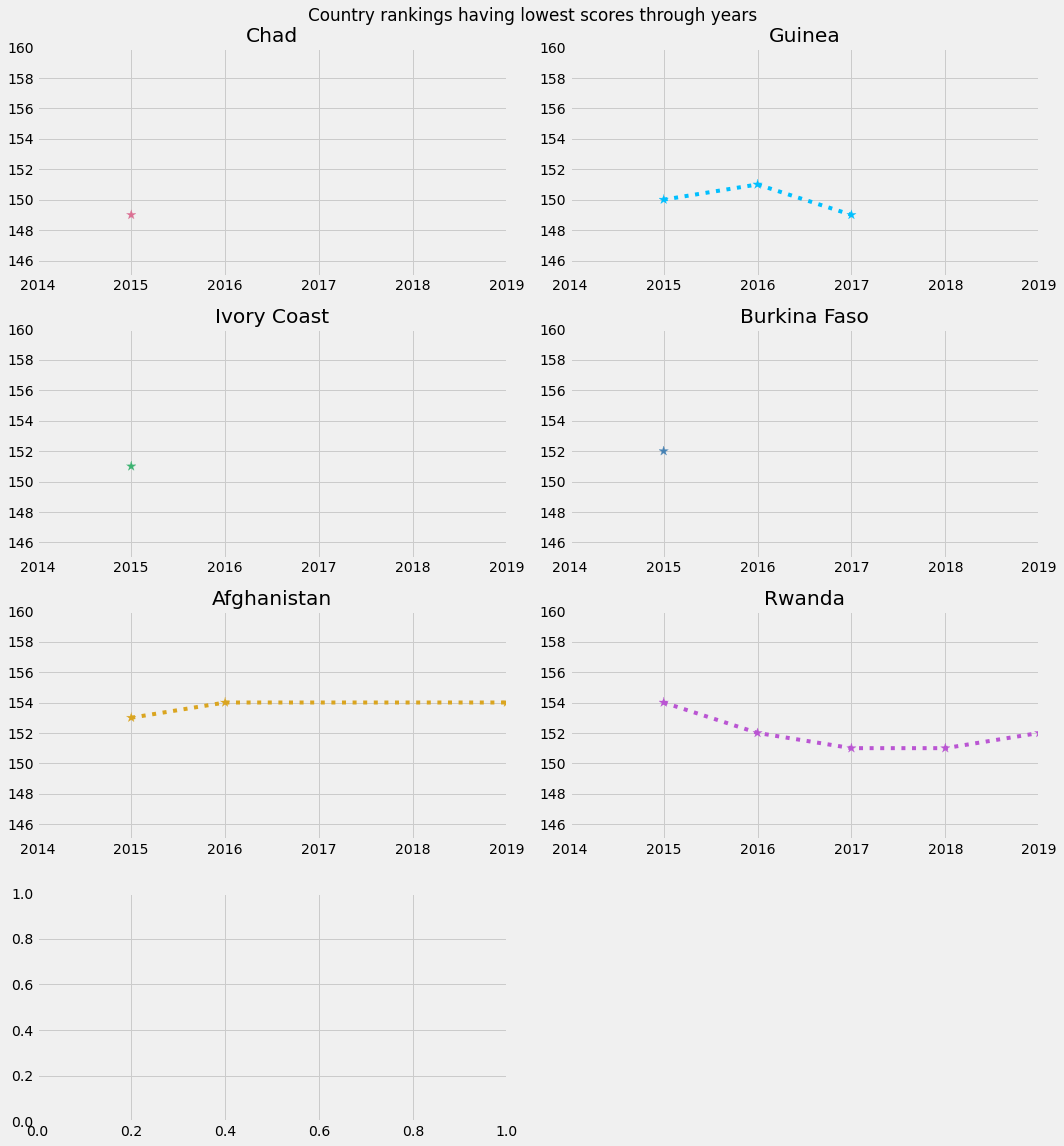

In [31]:
fig = plt.figure(figsize=(15,20))

for i,country in zip(range(10),grouped_years_["Country"].unique()):
    plt.subplot(5,2,i+1)
    plt.scatter(grouped_years_[grouped_years_["Country"] == country]["Year"], grouped_years_[grouped_years_["Country"] == country]["Rank"], s=100, marker="*", linestyle="dotted", c=colors[i])
    plt.plot(grouped_years_[grouped_years_["Country"] == country]["Year"], grouped_years_[grouped_years_["Country"] == country]["Rank"], linestyle="dotted", c=colors[i])
    plt.axis([2014,2019, 145,160])
    plt.title(country)
    plt.suptitle("Country rankings having lowest scores through years")
    plt.tight_layout()